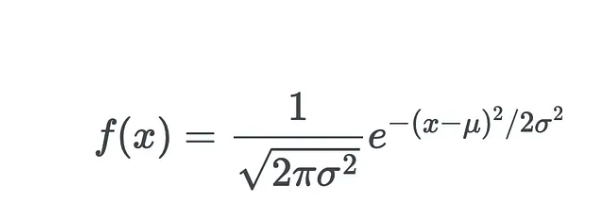

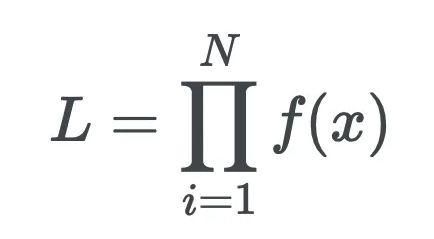

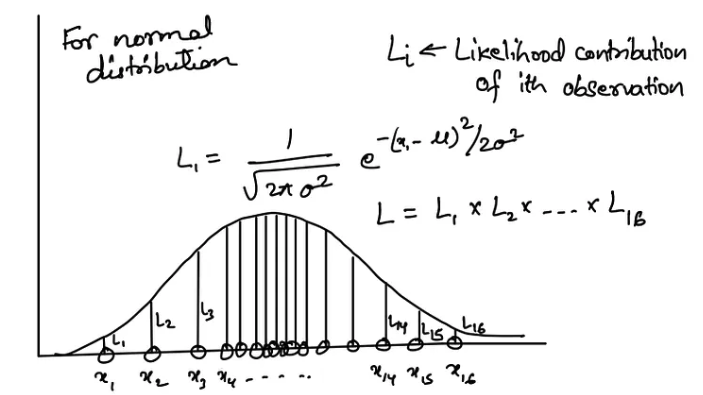

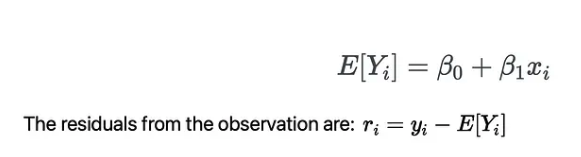

In [5]:

import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats
import pandas as pd
import statsmodels. api as sm
import matplotlib.pyplot as plt

#https://www.kaggle.com/datasets/budincsevity/szeged-weather
df = pd.read_csv('weatherHistory.csv')
x = df['Temperature (C)'][:100]
y = df['Humidity'][:100]

fig, ax = plt.subplots()
ax.plot(x,y, 'b*')
plt.savefig('temp_humidity.png',bbox_inches='tight', dpi=300)
plt.close()

FileNotFoundError: [Errno 2] No such file or directory: 'weatherHistory.csv'

In [6]:
x2 = sm.add_constant(x) 
modl = sm.OLS(y,x2) 
mod12=modl.fit() 
print(mod12.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1147.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           6.73e-56
Time:                        08:46:46   Log-Likelihood:                -485.54
No. Observations:                 100   AIC:                             975.1
Df Residuals:                      98   BIC:                             980.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -67.5930      6.232    -10.847      0.0

AttributeError: 'numpy.ndarray' object has no attribute 'const'

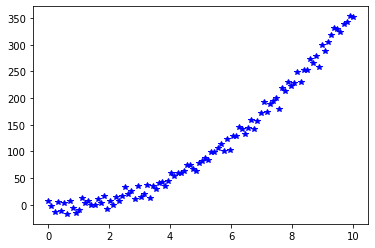

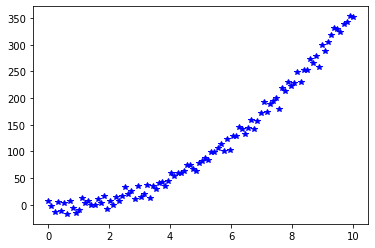

In [7]:
## Error
e=mod12.resid
estd = np.std(e)

fig, ax = plt.subplots()
ax.plot(x,y, 'b*')

# plot the regression output
fig, ax = plt.subplots()
ax.plot(x,y, 'b*')
xx = np.linspace(np.min(x), np.max(x), 100)
yy =  mod12.params[1]* xx +  mod12.params.const
ax.plot(xx,yy, 'r-')

In [8]:
def lik(parameters, x, y): 
    m = parameters[0] 
    b = parameters[1] 
    sigma = parameters[2] 
    
    y_exp = m * x + b 
        
    L = np.sum(np.log(norm.pdf(y - y_exp, loc = 0, scale=sigma)))
    return -L


def constraints(parameters):
    sigma = parameters[2]
    return sigma

cons = {
    'type': 'ineq',
    'fun': constraints
}

In [9]:
lik_model = minimize(lik, np.array([2, 2, 2]), args=(x,y,), constraints=cons)

NameError: name 'norm' is not defined

NameError: name 'lik_model' is not defined

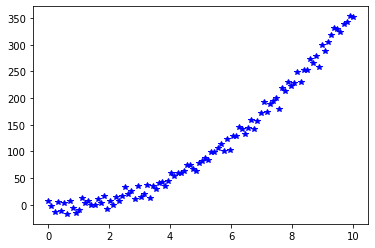

In [10]:
fig, ax = plt.subplots()
ax.plot(x,y, 'b*')
xx = np.linspace(np.min(x), np.max(x), 100)
yy = lik_model.x[0] * xx +  lik_model.x[1]
ax.plot(xx,yy, 'r-')                                                 
plt.savefig('temp_humidity_regression.png',bbox_inches='tight', dpi=300)
plt.close()